In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
cafe = pd.read_csv("dirty_cafe_sales.csv")
cafe.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Expected Total,Month,Day
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-08-09,4.0,August,Wednesday
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-Store,2023-05-16,12.0,May,Tuesday
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-Store,2023-07-19,4.0,July,Wednesday
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown,Unknown,2023-04-27,10.0,April,Thursday
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-Store,2023-11-06,4.0,November,Monday
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,NaN,2023-03-31,20.0,March,Friday
6,TXN_4433211,Unknown,3.0,3.0,9.0,Unknown,Takeaway,2023-06-10,9.0,June,Saturday
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,Unknown,2023-10-28,16.0,October,Saturday
8,TXN_4717867,NaN,5.0,3.0,15.0,NaN,Takeaway,2023-07-28,15.0,July,Friday
9,TXN_2064365,Sandwich,5.0,4.0,20.0,NaN,In-Store,2023-12-31,20.0,December,Sunday


In [3]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9667 non-null   object 
 2   Quantity          9521 non-null   float64
 3   Price Per Unit    9467 non-null   float64
 4   Total Spent       9498 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9540 non-null   object 
 8   Expected Total    9006 non-null   float64
 9   Month             9540 non-null   object 
 10  Day               9540 non-null   object 
dtypes: float64(4), object(7)
memory usage: 859.5+ KB


In [4]:
cafe.isnull().sum()

Transaction ID         0
Item                 333
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      2579
Location            3265
Transaction Date     460
Expected Total       994
Month                460
Day                  460
dtype: int64

In [5]:
cafe.rename(columns={
    'Transaction ID': 'Transaction_id',
    'Item': 'Item',
    'Quantity': 'Quantity',
    'Price Per Unit': 'Unit_price',
    'Total Spent': 'Total_spent',
    'Payment Method': 'Payment_method',
    'Location': 'Location',
    'Transaction Date': 'Transaction_date'
}, inplace=True)
cafe.head(10)

,Transaction_id,Item,Quantity,Unit_price,Total_spent,Payment_method,Location,Transaction_date,Expected Total,Month,Day
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-08-09,4.0,August,Wednesday
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-Store,2023-05-16,12.0,May,Tuesday
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-Store,2023-07-19,4.0,July,Wednesday
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown,Unknown,2023-04-27,10.0,April,Thursday
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-Store,2023-11-06,4.0,November,Monday
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,NaN,2023-03-31,20.0,March,Friday
6,TXN_4433211,Unknown,3.0,3.0,9.0,Unknown,Takeaway,2023-06-10,9.0,June,Saturday
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,Unknown,2023-10-28,16.0,October,Saturday
8,TXN_4717867,NaN,5.0,3.0,15.0,NaN,Takeaway,2023-07-28,15.0,July,Friday
9,TXN_2064365,Sandwich,5.0,4.0,20.0,NaN,In-Store,2023-12-31,20.0,December,Sunday


In [6]:
num_cols=['Quantity', 'Unit_price', 'Total_spent']
cafe[num_cols] = cafe[num_cols].apply(pd.to_numeric, errors='coerce')
cafe[num_cols].dtypes

Quantity       float64
Unit_price     float64
Total_spent    float64
dtype: object

In [7]:
cafe[num_cols] = cafe[num_cols].replace({
    'ERROR': np.nan,
    " ": np.nan
})
cafe.head(10)

,Transaction_id,Item,Quantity,Unit_price,Total_spent,Payment_method,Location,Transaction_date,Expected Total,Month,Day
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-08-09,4.0,August,Wednesday
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-Store,2023-05-16,12.0,May,Tuesday
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-Store,2023-07-19,4.0,July,Wednesday
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown,Unknown,2023-04-27,10.0,April,Thursday
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-Store,2023-11-06,4.0,November,Monday
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,NaN,2023-03-31,20.0,March,Friday
6,TXN_4433211,Unknown,3.0,3.0,9.0,Unknown,Takeaway,2023-06-10,9.0,June,Saturday
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,Unknown,2023-10-28,16.0,October,Saturday
8,TXN_4717867,NaN,5.0,3.0,15.0,NaN,Takeaway,2023-07-28,15.0,July,Friday
9,TXN_2064365,Sandwich,5.0,4.0,20.0,NaN,In-Store,2023-12-31,20.0,December,Sunday


In [8]:
catg_cols=['Item', 'Payment_method', 'Location']
cafe[catg_cols] = cafe[catg_cols].replace({
    'ERROR': 'Unknown',
    " ": 'Unknown',
    np.nan: 'Unknown',
    'UNKNOWN': 'Unknown'
})
cafe.head(10)

,Transaction_id,Item,Quantity,Unit_price,Total_spent,Payment_method,Location,Transaction_date,Expected Total,Month,Day
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-08-09,4.0,August,Wednesday
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-Store,2023-05-16,12.0,May,Tuesday
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-Store,2023-07-19,4.0,July,Wednesday
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown,Unknown,2023-04-27,10.0,April,Thursday
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-Store,2023-11-06,4.0,November,Monday
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,Unknown,2023-03-31,20.0,March,Friday
6,TXN_4433211,Unknown,3.0,3.0,9.0,Unknown,Takeaway,2023-06-10,9.0,June,Saturday
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,Unknown,2023-10-28,16.0,October,Saturday
8,TXN_4717867,Unknown,5.0,3.0,15.0,Unknown,Takeaway,2023-07-28,15.0,July,Friday
9,TXN_2064365,Sandwich,5.0,4.0,20.0,Unknown,In-Store,2023-12-31,20.0,December,Sunday


In [9]:
cafe[catg_cols] = cafe[catg_cols].apply(lambda col: col.str.lower())
cafe.head(10)

,Transaction_id,Item,Quantity,Unit_price,Total_spent,Payment_method,Location,Transaction_date,Expected Total,Month,Day
0,TXN_1961373,coffee,2.0,2.0,4.0,credit card,takeaway,2023-08-09,4.0,August,Wednesday
1,TXN_4977031,cake,4.0,3.0,12.0,cash,in-store,2023-05-16,12.0,May,Tuesday
2,TXN_4271903,cookie,4.0,1.0,NaN,credit card,in-store,2023-07-19,4.0,July,Wednesday
3,TXN_7034554,salad,2.0,5.0,10.0,unknown,unknown,2023-04-27,10.0,April,Thursday
4,TXN_3160411,coffee,2.0,2.0,4.0,digital wallet,in-store,2023-11-06,4.0,November,Monday
5,TXN_2602893,smoothie,5.0,4.0,20.0,credit card,unknown,2023-03-31,20.0,March,Friday
6,TXN_4433211,unknown,3.0,3.0,9.0,unknown,takeaway,2023-06-10,9.0,June,Saturday
7,TXN_6699534,sandwich,4.0,4.0,16.0,cash,unknown,2023-10-28,16.0,October,Saturday
8,TXN_4717867,unknown,5.0,3.0,15.0,unknown,takeaway,2023-07-28,15.0,July,Friday
9,TXN_2064365,sandwich,5.0,4.0,20.0,unknown,in-store,2023-12-31,20.0,December,Sunday


In [10]:
valid_rows = cafe[['Quantity','Unit_price','Total_spent']].notna().all(axis=1)

np.isclose(
    cafe.loc[valid_rows, 'Quantity'] * cafe.loc[valid_rows, 'Unit_price'],
    cafe.loc[valid_rows, 'Total_spent']
).all()



np.True_

In [11]:
cafe.head(50)

,Transaction_id,Item,Quantity,Unit_price,Total_spent,Payment_method,Location,Transaction_date,Expected Total,Month,Day
0,TXN_1961373,coffee,2.0,2.0,4.0,credit card,takeaway,2023-08-09,4.0,August,Wednesday
1,TXN_4977031,cake,4.0,3.0,12.0,cash,in-store,2023-05-16,12.0,May,Tuesday
2,TXN_4271903,cookie,4.0,1.0,NaN,credit card,in-store,2023-07-19,4.0,July,Wednesday
3,TXN_7034554,salad,2.0,5.0,10.0,unknown,unknown,2023-04-27,10.0,April,Thursday
4,TXN_3160411,coffee,2.0,2.0,4.0,digital wallet,in-store,2023-11-06,4.0,November,Monday
5,TXN_2602893,smoothie,5.0,4.0,20.0,credit card,unknown,2023-03-31,20.0,March,Friday
6,TXN_4433211,unknown,3.0,3.0,9.0,unknown,takeaway,2023-06-10,9.0,June,Saturday
7,TXN_6699534,sandwich,4.0,4.0,16.0,cash,unknown,2023-10-28,16.0,October,Saturday
8,TXN_4717867,unknown,5.0,3.0,15.0,unknown,takeaway,2023-07-28,15.0,July,Friday
9,TXN_2064365,sandwich,5.0,4.0,20.0,unknown,in-store,2023-12-31,20.0,December,Sunday


In [12]:
cafe['Transaction_date'] = cafe['Transaction_date'].replace('ERROR', np.nan)
cafe['Transaction_date'].head(15)

0     2023-08-09
1     2023-05-16
2     2023-07-19
3     2023-04-27
4     2023-11-06
5     2023-03-31
6     2023-06-10
7     2023-10-28
8     2023-07-28
9     2023-12-31
10    2023-07-11
11           NaN
12    2023-03-05
13    2023-01-06
14    2023-03-21
Name: Transaction_date, dtype: object

In [13]:
from dateutil import parser
def date_parser(date_str):
    try:
        return parser.parse(date_str, dayfirst=True)
    except Exception:
        return pd.NaT
cafe['Transaction_date'] = cafe['Transaction_date'].apply(date_parser)
cafe['Transaction_date'].head(15)

0    2023-09-08
1    2023-05-16
2    2023-07-19
3    2023-04-27
4    2023-06-11
5    2023-03-31
6    2023-10-06
7    2023-10-28
8    2023-07-28
9    2023-12-31
10   2023-11-07
11          NaT
12   2023-05-03
13   2023-06-01
14   2023-03-21
Name: Transaction_date, dtype: datetime64[ns]

In [14]:
#Most Purchased Item
cafe['Item'].mode()[0]

'juice'

In [15]:
Total_revenue = cafe['Total_spent'].sum()
print("Total Revenue:", Total_revenue)

Total Revenue: 84763.5


In [16]:
#Revenue by Item Category
Revenue_by_item = cafe.groupby('Item')['Total_spent'].sum().reset_index().sort_values(by='Total_spent', ascending=False)
Revenue_by_item

,Item,Total_spent
4,salad,16605.0
5,sandwich,12956.0
6,smoothie,12556.0
3,juice,9984.0
0,cake,9933.0
8,unknown,8140.0
1,coffee,6784.0
7,tea,4735.5
2,cookie,3070.0


In [17]:
Revenue_by_location =cafe.groupby('Location')['Total_spent'].sum().reset_index().sort_values(by='Total_spent', ascending=False) 
Revenue_by_location

,Location,Total_spent
2,unknown,33628.0
0,in-store,25906.0
1,takeaway,25229.5


In [18]:
cafe.head(50)

,Transaction_id,Item,Quantity,Unit_price,Total_spent,Payment_method,Location,Transaction_date,Expected Total,Month,Day
0,TXN_1961373,coffee,2.0,2.0,4.0,credit card,takeaway,2023-09-08,4.0,August,Wednesday
1,TXN_4977031,cake,4.0,3.0,12.0,cash,in-store,2023-05-16,12.0,May,Tuesday
2,TXN_4271903,cookie,4.0,1.0,NaN,credit card,in-store,2023-07-19,4.0,July,Wednesday
3,TXN_7034554,salad,2.0,5.0,10.0,unknown,unknown,2023-04-27,10.0,April,Thursday
4,TXN_3160411,coffee,2.0,2.0,4.0,digital wallet,in-store,2023-06-11,4.0,November,Monday
5,TXN_2602893,smoothie,5.0,4.0,20.0,credit card,unknown,2023-03-31,20.0,March,Friday
6,TXN_4433211,unknown,3.0,3.0,9.0,unknown,takeaway,2023-10-06,9.0,June,Saturday
7,TXN_6699534,sandwich,4.0,4.0,16.0,cash,unknown,2023-10-28,16.0,October,Saturday
8,TXN_4717867,unknown,5.0,3.0,15.0,unknown,takeaway,2023-07-28,15.0,July,Friday
9,TXN_2064365,sandwich,5.0,4.0,20.0,unknown,in-store,2023-12-31,20.0,December,Sunday


In [19]:
#Most common payment method
cafe['Payment_method'].mode()[0]

'unknown'

In [20]:
Average_spend = cafe['Total_spent'].mean().round(2)
print('Average_spend:', Average_spend)

Average_spend: 8.92


In [21]:
cafe['Month'] = cafe['Transaction_date'].dt.month_name().str.lower()
cafe['Day'] = cafe['Transaction_date'].dt.day_name().str.lower()
cafe.head(15)

,Transaction_id,Item,Quantity,Unit_price,Total_spent,Payment_method,Location,Transaction_date,Expected Total,Month,Day
0,TXN_1961373,coffee,2.0,2.0,4.0,credit card,takeaway,2023-09-08,4.0,september,friday
1,TXN_4977031,cake,4.0,3.0,12.0,cash,in-store,2023-05-16,12.0,may,tuesday
2,TXN_4271903,cookie,4.0,1.0,NaN,credit card,in-store,2023-07-19,4.0,july,wednesday
3,TXN_7034554,salad,2.0,5.0,10.0,unknown,unknown,2023-04-27,10.0,april,thursday
4,TXN_3160411,coffee,2.0,2.0,4.0,digital wallet,in-store,2023-06-11,4.0,june,sunday
5,TXN_2602893,smoothie,5.0,4.0,20.0,credit card,unknown,2023-03-31,20.0,march,friday
6,TXN_4433211,unknown,3.0,3.0,9.0,unknown,takeaway,2023-10-06,9.0,october,friday
7,TXN_6699534,sandwich,4.0,4.0,16.0,cash,unknown,2023-10-28,16.0,october,saturday
8,TXN_4717867,unknown,5.0,3.0,15.0,unknown,takeaway,2023-07-28,15.0,july,friday
9,TXN_2064365,sandwich,5.0,4.0,20.0,unknown,in-store,2023-12-31,20.0,december,sunday


In [22]:
#monthly sales trend
cafe['month_number'] = cafe['Transaction_date'].dt.month
monthly_sales = cafe.groupby(['month_number','Month'])['Total_spent'].sum().reset_index().sort_values('month_number')
monthly_sales

,month_number,Month,Total_spent
0,1.0,january,6845.0
1,2.0,february,6304.0
2,3.0,march,6822.0
3,4.0,april,6730.5
4,5.0,may,6674.0
5,6.0,june,7071.5
6,7.0,july,6574.0
7,8.0,august,6904.0
8,9.0,september,6501.5
9,10.0,october,7040.5


In [23]:
busiest_month = monthly_sales.idxmax()
print('Busiest_month:', busiest_month)

Busiest_month: month_number    11
Month            8
Total_spent      5
dtype: int64


In [24]:
slowest_month = monthly_sales.idxmin()
print('slowest_month:', slowest_month)

slowest_month: month_number    0
Month           3
Total_spent     1
dtype: int64


In [25]:
Daily_sales_performance = cafe.groupby('Day')['Total_spent'].sum().sort_values()
Daily_sales_performance

Day
wednesday    11065.0
saturday     11424.0
tuesday      11437.0
monday       11633.5
friday       11640.0
sunday       11726.5
thursday     11874.5
Name: Total_spent, dtype: float64

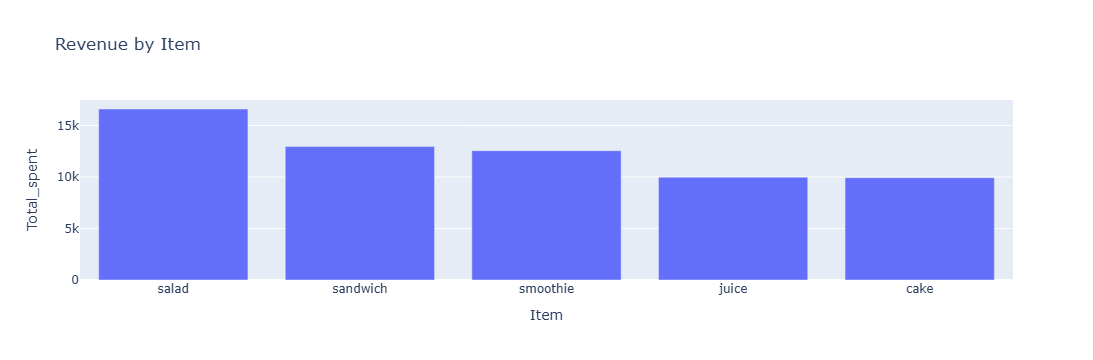

In [26]:
Revenue_by_item = cafe.groupby('Item')['Total_spent'].sum().reset_index().sort_values(by='Total_spent', ascending=False).head(5)
fig = px.bar(
    Revenue_by_item,
    x = 'Item',
    y = 'Total_spent',
    title = 'Revenue by Item',
    
)
fig.show()

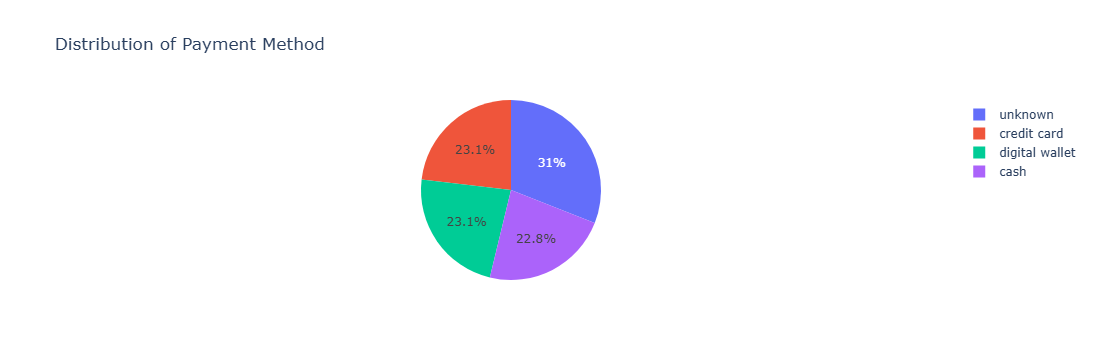

In [27]:
Revenue_by_payment_method = cafe.groupby('Payment_method')['Total_spent'].sum().reset_index()
fig = px.pie(
    Revenue_by_payment_method,
    names='Payment_method',
    values='Total_spent',
    title='Distribution of Payment Method'
)
fig.show()

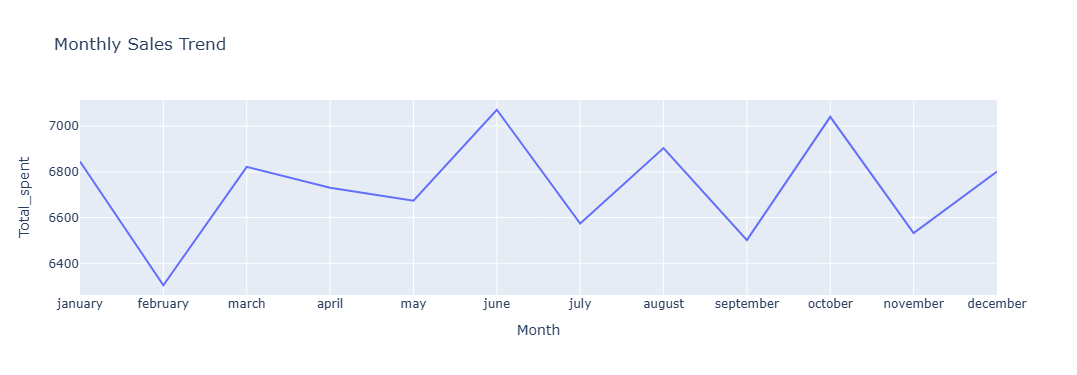

In [28]:
fig = px.line(
    monthly_sales,
    x = 'Month',
    y = 'Total_spent',
    title = 'Monthly Sales Trend'
)
fig.show()

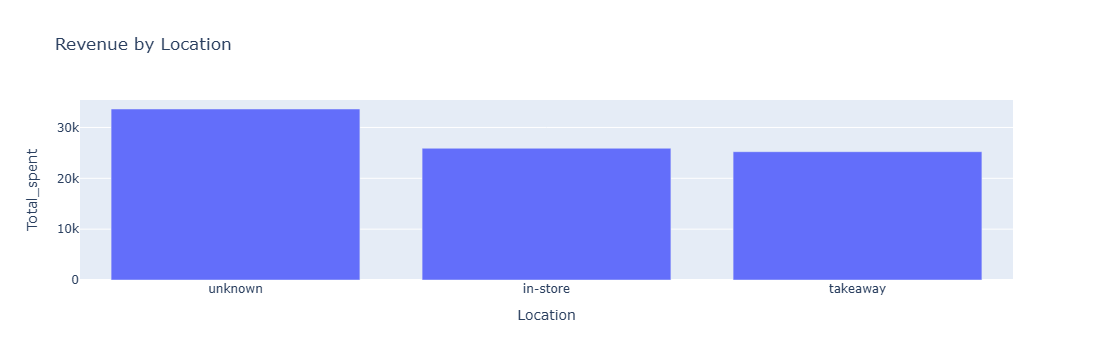

In [29]:
fig = px.bar(
    Revenue_by_location,
    x = 'Location',
    y = 'Total_spent',
    title = 'Revenue by Location'
)
fig.show()

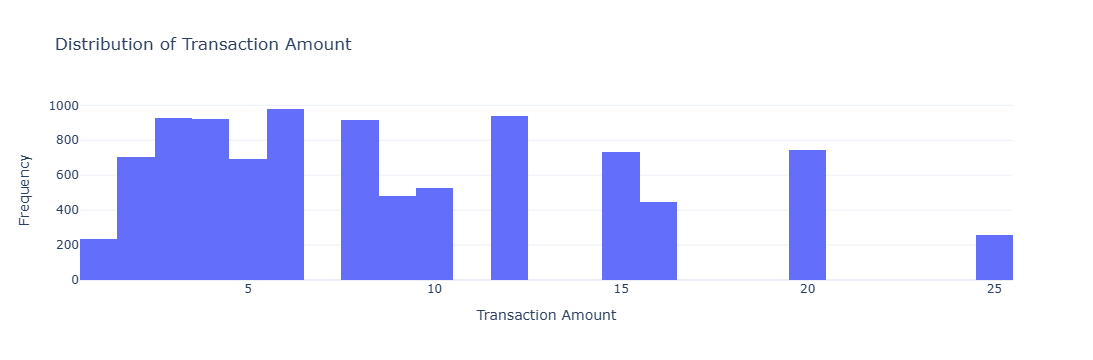

In [30]:
fig = px.histogram(
    cafe,
    x='Total_spent',
    nbins=30,
    title='Distribution of Transaction Amount'
)

fig.update_layout(
    xaxis_title='Transaction Amount',
    yaxis_title='Frequency',
    template='plotly_white'
)

fig.show()

#Insights
Top-performing item by sales is Salad, which generated a sales revenue of 16,605.
Sales performance spiked in june and october while recording a lower sales performance in February and September
Most on-demand product is juice but is not our top performing product. 
This is as a result of price differential. Juice sells at 3 while salad sells at 5.

There were some missing and wrong entries in the dataset which were handled correctly by replacing them with unknowns for proper analysis.

Recommendations for improving data quality and cafe operations
> Increase stock for high-demand products and reduce stock for low-demand products
> Better pricing strategies for products with high-demand
> Increase staff workers during the busiest month(June) and reduce staff workers during slower month for staff optimization
> Bundle top selling products with discounts to boost average spend per transaction
    

In [ ]:
cafe.to_csv("dirty_cafe_sales.csv", index=False)